In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas as pd

# Problem Set 1
## **1.** In the early stages of the development of a frog embryo, cell division occurs at a fairly regular rate. Suppose you observe that all cells divide, and hence the number of cells doubles, roughly every halfhour.


#### (a) Write down an equation modeling this situation. You should specify how much real-world time is represented by an increment of 1 in t and what the initial number of cells is. [2 points]


Equation:

N_array[time_point] = N_array[time_point-1]*2


In this equation, each time point is 30 minutes after the previous time point. 

#### (b)Produce a table and graph of the number of cells as a function of t. [2 points]

In [3]:
def frog_embryo (N0,time_points): #stuff in () is the arguments for the function
    size = len(time_points)
    N_array = np.zeros(size) #make a box of zeros as place holders, its length should be the amount of time points
    N_array[0] = N0 #At the initial timepoint, the abundance is N0. Square brackets mean we are indexing something
    #now make the for loop
    for time_point in np.arange(1,size): #arange like a_range not arrange. by adding 1 it starts it on the second element, so N0 is still first
        N_array[time_point] = N_array[time_point-1]*2
    return N_array #return the abundance arrray
#in this equation, each time point is 30 minutes after the previous time point. 


In [4]:
# Set the number of time steps
start = 0
stop = 21 #I did this because it represents 10 hours in problem 1c
N0=2

#np.arange returns evenly spaced numbers over a specified interval
time_points1 = np.arange(start,stop) #arange(x,y) gives it a range from x to y

#make an array
Frog_embryo_1 = frog_embryo (N0,time_points=time_points1)

**NOTE FOR LISA** I have put it as N0 = 2 because that is how I interpreted the question. In talks with classmates, others are starting at 1. This puts the 10 hour mark at either 1 or 2 million cells, as you will see below. This does not change that the long-term growth rate is not consistent with the numbers in part c:

In [10]:
data = {'Hours':time_points1/2, 'Number of Cells': Frog_embryo_1}
df = pd.DataFrame(data=data)
print(df)

    Hours  Number of Cells
0     0.0              2.0
1     0.5              4.0
2     1.0              8.0
3     1.5             16.0
4     2.0             32.0
5     2.5             64.0
6     3.0            128.0
7     3.5            256.0
8     4.0            512.0
9     4.5           1024.0
10    5.0           2048.0
11    5.5           4096.0
12    6.0           8192.0
13    6.5          16384.0
14    7.0          32768.0
15    7.5          65536.0
16    8.0         131072.0
17    8.5         262144.0
18    9.0         524288.0
19    9.5        1048576.0
20   10.0        2097152.0


Text(0, 0.5, 'Number of cells')

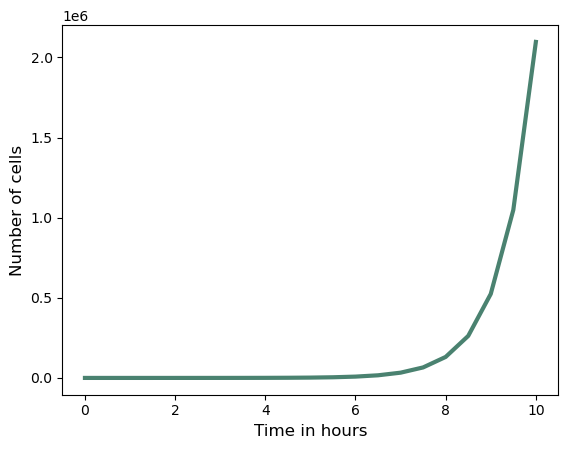

In [13]:
plt.plot(time_points1/2, Frog_embryo_1, color ='#4A8270', linewidth = 3.0) 
plt.xlabel("Time in hours", fontsize=12)
plt.ylabel("Number of cells", fontsize=12)

#### (c) Further observation shows that, after 10 hours, the embryo has around 30,000 cells. Is this roughly consistent with your model? What biological conclusions and/or questions does this raise? [2 points]

Our written model, where the number of cells doubles every half hour, would have over 2 million cells after 10 hours. We can conclude that the biology of this organism might exhibit exponential growth in the early stages, but that this growth slows at some time point. Our means that this model is not realistic over the time frame ot 10 hours. Potentially there are density-dependent factors going on, or maybe cell specialization takes time, or cellular processes decrease the time to cell division.

## **2.** If the data in the table below on population size were collected in a laboratory experiment using insects, would it be consistent with a geometric model? (Note: the geometric model is the discrete version of the continuous exponential model.) Would it be consistent with a geometric model for at least some range of times? Explain. [2 points]

I started by creating the data in a dataframe:

In [17]:
#Here is the data
start=0
stop=10
step = 10
t= np.linspace(start,stop,step+1)
Nt = np.array([0.87,1.52, 2.31, 3.36, 4.63, 5.94, 7.04, 7.76, 8.13, 8.3, 8.36])
data = {'t':t, 'Nt': Nt}
df = pd.DataFrame(data=data)
print(df)

       t    Nt
0    0.0  0.87
1    1.0  1.52
2    2.0  2.31
3    3.0  3.36
4    4.0  4.63
5    5.0  5.94
6    6.0  7.04
7    7.0  7.76
8    8.0  8.13
9    9.0  8.30
10  10.0  8.36


Then I created data from the discrete geometric model:
$$N_{t} = R^tN_{0}$$

In [89]:
#Here is a constructed array of the discrete version of the continuous exponential model 
# Set the number of time steps
time_steps = 10
start = 0
stop = 10

#np.linspace returns evenly spaced numbers over a specified interval, here denoted by 'start' and 'stop'
time_points = np.linspace(start,stop,time_steps+1)

#np is calling numpy. interval is start and stop, this gives the numbers over that interal by the time_steps

#Set the intrinsic growth rate. I wanted to get these overlapping at 10 time steps, so I solved for R (8.36 = (R^(10))*(0.87)) and found R=1.253917
r=1.253917
#You could also look at this with r as 1.52, which keeps the values the same for a while longer
r2=1.35

# Set the initial number of individuals
N0 = Nt[0]

# Pre-allocate an array for the appropriate number of time steps
size = len(time_points)
N_array = np.zeros(size)
N_array2 = np.zeros(size)

#writing the geometric model
for index, time_point in enumerate(time_points):
    N_array[index] = N0*(r**time_point)
    N_array

for index, time_point in enumerate(time_points):
    N_array2[index] = N0*(r2**time_point)
    N_array2


In [90]:
#Data together:
data = {'t':t, 'Provided Nt': Nt, 'Geometric Nt r=1.25':N_array, 'Geometric Nt r=1.35':N_array2}
df2 = pd.DataFrame(data=data)
print(df2)

       t  Provided Nt  Geometric Nt r=1.25  Geometric Nt r=1.35
0    0.0         0.87             0.870000             0.870000
1    1.0         1.52             1.090908             1.174500
2    2.0         2.31             1.367908             1.585575
3    3.0         3.36             1.715243             2.140526
4    4.0         4.63             2.150772             2.889710
5    5.0         5.94             2.696890             3.901109
6    6.0         7.04             3.381676             5.266497
7    7.0         7.76             4.240341             7.109771
8    8.0         8.13             5.317036             9.598191
9    9.0         8.30             6.667121            12.957558
10  10.0         8.36             8.360017            17.492704


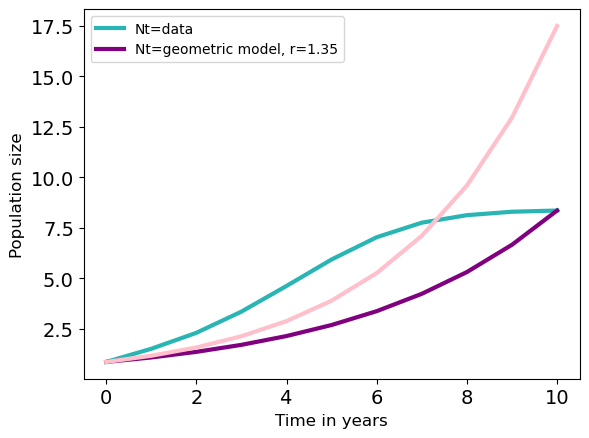

In [91]:
plt.plot(t, Nt, color ='#28B5B3', linewidth = 3.0) 
plt.plot(t,N_array, color = 'purple', linewidth = 3.0)
plt.plot(t,N_array2, color = 'pink', linewidth = 3.0)
plt.xlabel("Time in years", fontsize=12)
plt.ylabel("Population size", fontsize=12)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(['Nt=data', 'Nt=geometric model, r=1.25'])
plt.legend(['Nt=data', 'Nt=geometric model, r=1.35'])

I set r so that the final data points would intersect. You can see that the slopes of each of these curves are completley different. The provided data appears to be approaching an asymptote, closer to logarithmic growth than exponential growth. 

## **3.**Complete the following.
   The models: $$P_t+1 = λP_t $$ $$dP/dt = rP$$ 
    
   (a) represent **growing** populations when λ is any number in the range:  **λ>1**
   and r is in the range **r>0**
   
   (b) represent **declining** populations when λ is any number in the range:  **λ<1**
   and r is in the range **r<0**
   
   (c) represent **stable** populations when λ is any number in the range:  **λ=1**
   and r is in the range **r=0**
   

## **4.**Complete the following.

Suppose a population is described by the model $$N_{t+1} = 1.5N_t$$ and $$N_5 = 7.3$$. Find $$N_t$$ for t = 0, 1, 2, 3, 4.

$$7.3 = 1.5 * N_4 $$
$$N_4 = 4.86 $$
$$4.86 = 1.5 * N_3$$
$$N_3 = 3.24$$
$$3.24 = 1.5 * N_3$$
$$N_2 = 2.16$$
$$2.16= 1.5 * N_2$$
$$N_1 = 1.44$$
$$1.44 = = 1.5 * N_1$$
$$N_0 = 0.96 $$

In [24]:
start=0
stop= 5
step = 5
Q4_t= np.linspace(start,stop,step+1)
Q4_Nt = np.array([0.96, 1.44, 2.16, 3.24, 4.86, 7.3])
data = {'t':t, 'Nt': Nt}
df = pd.DataFrame(data=data)
data = {'t':Q4_t, 'Nt': Q4_Nt}
df = pd.DataFrame(data=data)
print(df)

     t    Nt
0  0.0  0.96
1  1.0  1.44
2  2.0  2.16
3  3.0  3.24
4  4.0  4.86
5  5.0  7.30


## **5.** Suppose a population is modeled by the equation $$N_{t+1} = 2N_t$$ where $$N_t$$ is measured in individuals. If we choose to measure the population in thousands of individuals, denoting this by $$P_t$$, then the equation modeling the population might change. Explain why the model is still just $$P_{t+1} = 2P_t$$.

The model Nt might have the unit of one individual, but the unit does not matter for the mathmatical model. Thus, if the unit is 1 or 1000 individuals, it does not change that the proportion of those individuals is given by the displayed function.
When Nt = 1000Pt, Nt+1 = 1000Pt+t
So, 1000Pt+1 = 2000Pt
Which reduces to the same equation.

## **6.** In the model $$dP/dt = 1.3P(1 − P/10)$$ what values of P will cause $$dP/
dt$$ to be positive? Negative?

Solving for $\frac{dP}{dt} = 0$, we get either $P = 0$ or $1-P/10 = 0$, which is $P=10$. At $P<10$, $1-P/10$ is positive, and $\frac{dP}{dt}$ is positive. At P>10, $1-P/10$ is negative, and thus $\frac{dP}{dt}$ is negative. Also, when P<0, P is negative. This means that the population hits an equilibrium point at these values. When you graph this equation, you can look at the stability of these points and find that P=0 is an unstable point, but P=10 is a stable point.

### Why does this matter biologically?

This matters biologically becasue a small perturbation of the equlibrium point at P=0 will increase the population away from 0, but a small perturbation at P=10 will bring the population back towards 10. This gives us an understanding of the long-term population dynamics of this model.

## 7. Suppose a population is modeled by the equation $$N_{t+1} = N_t+0.2N_t(1− \frac{N_t}{200,000})$$ where $N_t$ is measured in individuals.

(a) Find an equation of the same form, describing the same model, but with the population measured in thousands of individuals.

To to this, I set $N_{t+1} = 1000M_t$ and $N_t = 1000M_t$ and found the descriptive model $$M_{t+1}=M_t + 0.2M_t(1-(M_t)/200)$$

(b) Find an equation of the same form, describing the same model, but with the population measured
in units chosen so that the carrying capacity is 1 in those units. (To get started, determine the
carrying capacity of the original form of the model).

In this equation, K = 200,000. This is a discrete time density dependent model. To create a model where the population is measured in proportion to the carrying capacity, you would look for a model like:

$$N_{t+1}=λN_t(1-N_t)$$

When I set Nt= 200000Nt and Nt+1=2000000Nt+1 and reduce I get $$N_{t+1}=N_t(1.2-0.2N_t)$$

## 8. Often, when a population level is too low, the population can decline - this is known as the Allee effect. This effect can be incorporated in a simple model of the form
$$\frac{dN}{dt}=rN(N-a)(1-\frac{N}{K})$$
where the positive parameter a is the threshold population level above which the population will grow.


##### a. Find the equilibria of this model:
The equilibria of this model would be where the population is not changing over time. This means the above representation of the model would equal zero. This happens at:
$$N = 0$$
$$N = a$$
$$N = K$$

##### b. Determine the stability of all equilibria:
$$\frac{dn}{dt} = \frac{dN}{dt}-\frac{dN^*}{dt} $$
at fixed points, the second portion of that equation is equal to zero, leaving us with:
$$ \frac{dN}{dt} = F(N) = rN(N-a)(1-\frac{N}{K})$$

$$ λ = 2rN-3r\frac{N^2}{K} - rNa + 2ra\frac{N}{K}$$

$$rN^2-\frac{N^3}{K}-rNa+r\frac{N^2}{K}$$

if λ is negative, the perturbation is decreasing in size over time, so we are looking for values to make λ be negative at the fixed points

for N* = 0
$$λ = 2r(0)-3r\frac{0^2}{K} - r0a + 2ra\frac{0}{K}$$
$$λ = -ra $$
this implies that N=0 is stable if r and a are both positive

for N* = a
$$λ = 2r(a)-3r\frac{a^2}{K} - ra^2 + 2ra\frac{a}{K}$$
$$λ = ra(1-\frac{a}{K}) $$
this implies that if r and a are positive, N=a is stable if a > K

for N* = K
$$λ = 2rK-3r\frac{K^2}{K} - rKa + 2ra\frac{K}{K}$$
$$λ = ra-rK $$
$$λ = r(a-K) $$
this implies that if r and a are both positive, N=K is stable if K > a

#### c. Graph the per capita growth rate (i.e., dN/dt) against the population size N. Indicate the equilibria on your plot. Visually inspect the stability of the fixed points. Do they match what you found analytically?

In [88]:
def Allee2(N, r,a, K):
    return r*N*(N-a)*(1-(N/K))

Text(0.5, 1.0, 'a>K')

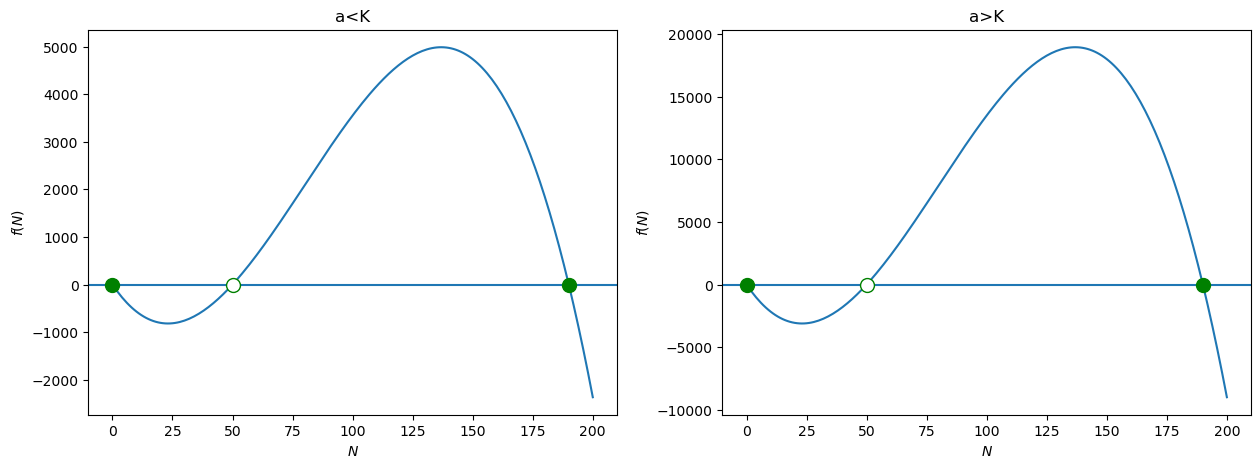

In [248]:
r = 1.5
N0 = 40
N = np.linspace(0, 200, 201)
K1 = 190
a1 = 50
K2 = 50
a2 = 190
nmax = 100

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(N, Allee2(N, r, a1, K1))
ax[0].axhline(y = 0.5, linestyle = '-')
ax[0].set_xlabel('$N$')
ax[0].set_ylabel('$f(N)$')
ax[0].plot(50,0,marker="o", markersize=10, markerfacecolor = "white", markeredgecolor="green")
ax[0].plot(190,0,marker="o", markersize=10, markerfacecolor = "green", markeredgecolor="green")
ax[0].plot(0,0,marker="o", markersize=10, markerfacecolor = "green", markeredgecolor="green")
ax[0].set_title('a<K');

ax[1].plot(N, Allee2(N, r, a2, K2))
ax[1].axhline(y = 0.5, linestyle = '-')
ax[1].set_xlabel('$N$')
ax[1].set_ylabel('$f(N)$')
ax[1].plot(50,0,marker="o", markersize=10, markerfacecolor = "white", markeredgecolor="green")
ax[1].plot(190,0,marker="o", markersize=10, markerfacecolor = "green", markeredgecolor="green")
ax[1].plot(0,0,marker="o", markersize=10, markerfacecolor = "green", markeredgecolor="green")
ax[1].set_title('a>K')

if
$$0<N<a<K$$ K is stable but a is unstable.
and if
$$0<N<K<a$$ a is stable but K is unstable.

#### d. Discuss the behavior of this model and contrast it with the behavior of the simple logistic model.
The Allee model differs from the logistic model in its addition of a, the allee effect. In this, if the population goes below a certain threshold as defined by a, the population will decrease. In the logistic model, this is where population increases the fastest. Both models decrease after K (as long as K is less than a), which biologically makes sense as this is the carrying capacity. There should not be an instance where K < a based on the biological definition of these terms.


## 9. The logistic map is given as $$N_{t+1} = F(N_t) = rN_t(1-N_t)$$ 
Note that in this formulation, we assume that N is written as a fraction of carrying capacity. Remember to choose your N0 and set your axes accordingly!).

#### a. Generate cobweb plots and time series for r = 2.8, 3.3, 3.55, 3.829

In [29]:
#Generating a time series based off the Nt+1 function:
def Logistic_map(r,N0,time_points): 
    size = len(time_points)
    N_array = np.zeros(size) 
    N_array[0] = N0 
    for time_point in np.arange(1,size): #arange like a_range not arrange. by adding 1 it starts it on the second element, so N0 is still first
        N_array[time_point] = r*(N_array[time_point-1])*(1-N_array[time_point-1])
    return N_array #return the abundance arrray

In [48]:
def Logistic_map2(N,r):
    return r*N*(1-N)

In [53]:
start = 0
stop = 100
r1= 2.8
r2= 3.3
r3= 3.55
r4= 3.829
N0 = 0.1
N = np.linspace(0, 1, 10)
nmax = 100

#np.arange returns evenly spaced numbers over a specified interval
time_points1 = np.arange(start,stop) #arange(x,y) gives it a range from x to y

# Generate multiple time series by calling the Logistic map function defined above
N_array_r1 = Logistic_map(r=r1,N0=N0,time_points=time_points1)
N_array_r2 = Logistic_map(r2,N0,time_points1)
N_array_r3 = Logistic_map(r3,N0,time_points1)
N_array_r4 = Logistic_map(r4,N0,time_points1)

Altering the cobweb function from Lab 2 returned:

In [54]:
def plot_cobweb(f, r, N0, nmax=40, dpi=72):
    # Iterate N = f(N) for nmax steps, starting at (N0, 0).
    path_x, path_y = np.zeros((2,nmax+1,1))
    path_x[0], path_y[0] = N0, 0
    for n in range(1, nmax, 2):
        path_x[n] = path_x[n-1]
        path_y[n] = f(path_x[n-1], r)
        path_x[n+1] = path_y[n]
        path_y[n+1] = path_y[n]

    return path_x, path_y

In [57]:
path_x1, path_y1 = plot_cobweb(Logistic_map2, r=r1, N0=N0, nmax=nmax)
path_x2, path_y2 = plot_cobweb(Logistic_map2, r2, N0, nmax=nmax)
path_x3, path_y3 = plot_cobweb(Logistic_map2, r3, N0, nmax=nmax)
path_x4, path_y4 = plot_cobweb(Logistic_map2, r4, N0, nmax=nmax)

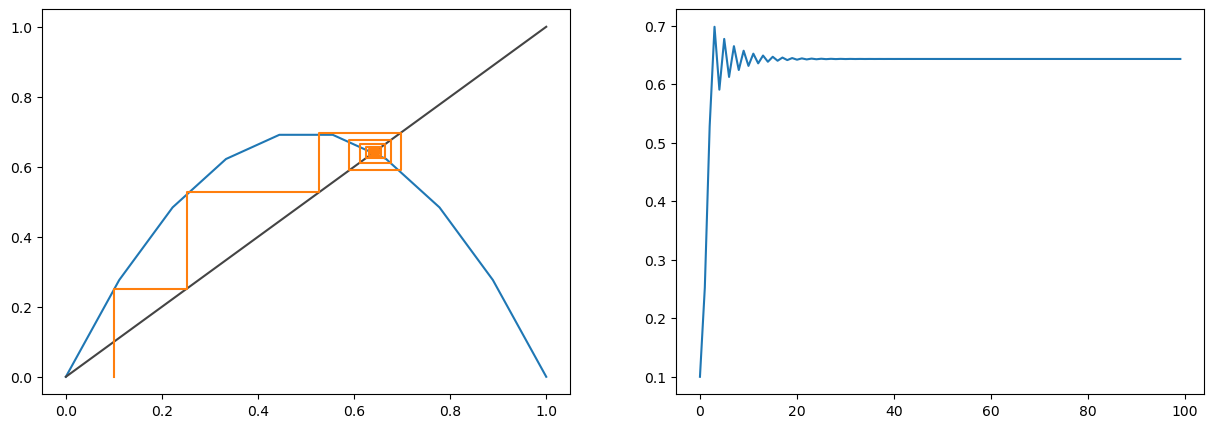

In [62]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
#Plot the function
ax[0].plot(N,Logistic_map2(N=N,r=r1))
#Plot the reference line
ax[0].plot(N,N,c='#444444')
#Plot the path traced out by the iteration
ax[0].plot(path_x1, path_y1)

ax[1].plot(N_array_r1)

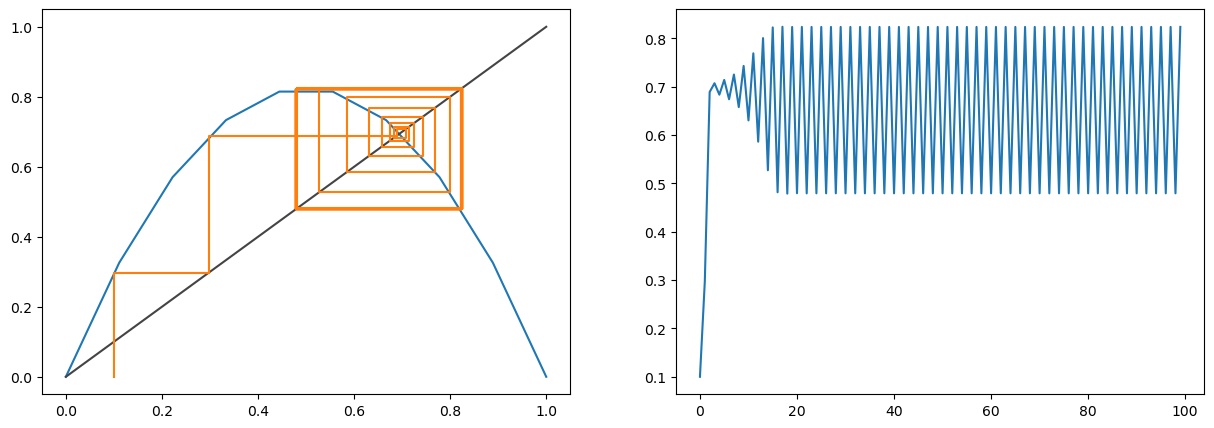

In [63]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
#Plot the function
ax[0].plot(N,Logistic_map2(N=N,r=r2))
#Plot the reference line
ax[0].plot(N,N,c='#444444')
#Plot the path traced out by the iteration
ax[0].plot(path_x2, path_y2)

ax[1].plot(N_array_r2)

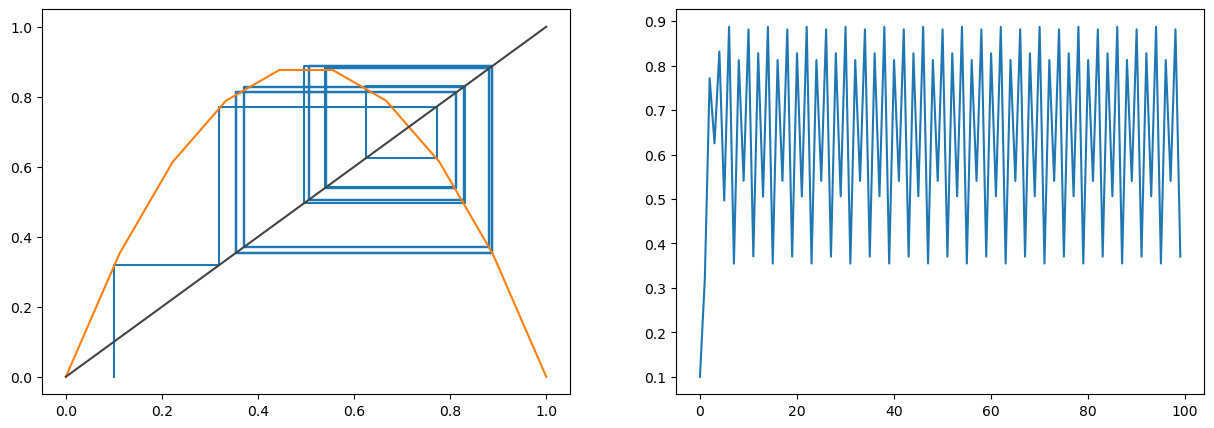

In [66]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(path_x3, path_y3)
ax[0].plot(N,Logistic_map2(N=N,r=r3))
#Plot the reference line
ax[0].plot(N,N,c='#444444')
#Plot the path traced out by the iteration
ax[1].plot(N_array_r3)

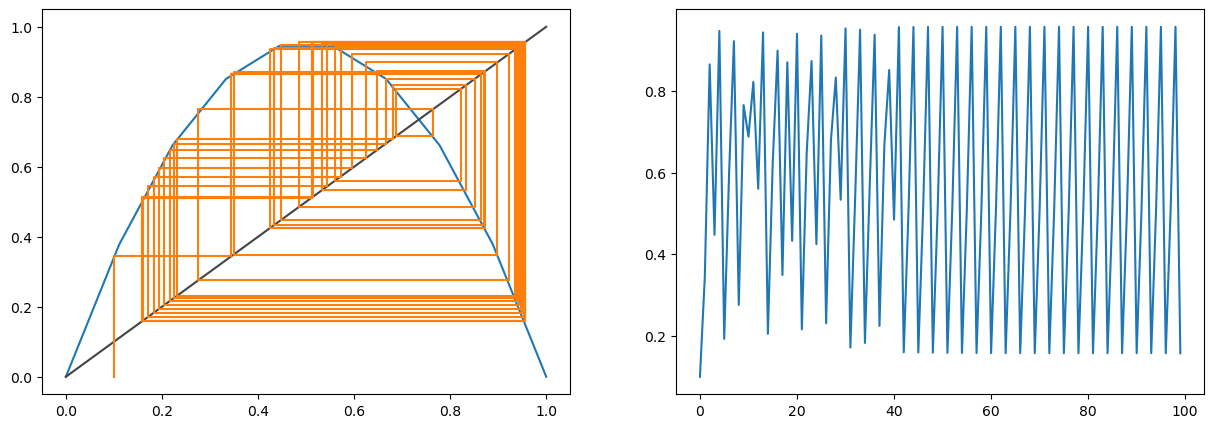

In [68]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
#Plot the function
ax[0].plot(N,Logistic_map2(N=N,r=r4))
#Plot the reference line
ax[0].plot(N,N,c='#444444')
#Plot the path traced out by the iteration
ax[0].plot(path_x4, path_y4)

ax[1].plot(N_array_r4)

#### b. What happens to the time series as r increases? What happens to the parabola as r increases?

As r increases, the oscillations increase in size. It does still oscillate at what seems to be a fixed rate, but it does not settle on one fixed point. The parabola steepens as r increases. 

## 10. For further (optional) reading on chaos beyond our two textbooks, please take a look at the chaos entry in the Encyclopedia of Theoretical Ecology and Beninca et al. (2015). Both of these are in the Resources folder of the Class Drive.

#### a. Define chaos and explain why this makes local weather forecasting difficult over a timescale of more than a few days.

Chaos looks like randomness, but it is still constrained. If it is truly random, there would be no attractors, but in chaotic dynamics, there are attractors. Over a small time scale, like the weather, it can be difficult to accurately predict. Chaos is incredibly sensitive to initial conditions. Predicting weather without error is impossible, and so these initial conditions can vary, leading to impredictability in the model.

#### b. Explain why it may nevertheless be possible to predict global climate change into the future.

In long-term time scales there are constraints that lead to overall paterns that can be discerned and used to predict things like global climate change. There are still attractors in chaotic systems.

#### c. Discuss the implications of chaotic dynamics for biological systems. 

It can show that in certain systems it can be highly difficult to predict patterns over small spatial or temporal time scales. Sometimes, models can seem incorrect from the realized values due to the non-equilibrium dynamics of chaotic systems.

Additionally, with the butterfly effect, there is a large sensitivity to initial conditions. 

## 11. In class, we discussed how to analyze the growth rate and structure of a population from its Leslie/projection/ demography matrix. Often, demographic data is collected in the form of a life table; some simple calculations are then required to construct the projection matrix. To construct a life table for a population, a single cohort of individuals is tracked over their lifespan, and their survival and fecundities are recorded. Here is an example of a life table:

In [16]:
x= pd.Series([0,1,2,3])
S = pd.Series([500,400,40,0])
b = pd.Series([0,2.5,3.0,0])
df=pd.concat([x,S,b],axis=1)
print(df)

   0    1    2
0  0  500  0.0
1  1  400  2.5
2  2   40  3.0
3  3    0  0.0


### (a) The third column gives the survivorship schedule (the proportion of the original cohort that survives to age x, which is given by $$l(x) = \frac{S(x)}{S(0)}$$ Fill in this column in the table above, as well as the next column, l(x)b(x).

In [201]:
def survivorship_schedule(Sx):
    size = len(Sx)
    lx = np.zeros(size)
    S0 = Sx[0]
    for x in np.arange(1,size):
        lx[x] = Sx[x]/Sx[0]
    return lx

In [202]:
Sx = np.array([500,400,40,0])
S0 = Sx[0]

In [208]:
l=pd.Series(survivorship_schedule(Sx))

In [210]:
df=pd.concat([x,S,b,l],axis=1)
print(df)

   0    1    2     3
0  0  500  0.0  0.00
1  1  400  2.5  0.80
2  2   40  3.0  0.08
3  3    0  0.0  0.00


In [216]:
lb=pd.Series([0,(2.5*0.8),(3.0*0.08),0])

In [217]:
df=pd.concat([x,S,b,l,lb],axis=1)
print(df)

   0    1     2     3     4
0  0  500  0.00  0.00  0.00
1  1  400  2.00  0.80  2.00
2  2   40  0.24  0.08  0.24
3  3    0  0.00  0.00  0.00


### b. Next, calculate the net reproductive rate of an individual as: $$R_0= \Sigma_{x=0}^{k}l(x)b(x)$$

In [220]:
lb.sum()

2.24

#### Where does this formulation come from and what does this mean biologically?

This is the normalized number of individuals that are created in the next generation by an individual over the course of their lifetime. It comes from multiplying the odds of living to the next age [l(x)] by the number of young produced during that age [b(x)]

#### c. To go from a life table to a demography matrix, we must switch from ages to age classes where we consider the ith age class to be all individuals from the ages (i − 1) to (i). So, the first age class would be 0 to 1 year-olds, the second would be 1 to 2 year-olds, etc. This shift can be a bit tricky, since it depends on when during the year births and deaths occur. The simplest way is to assume that at each time step, individuals reproduce simultaneously, then move up an age class, then we census the population. In this case, the probability of an individual in age class surviving to age class i + 1 is given by:
$$P_i = \frac{l(i)}{l(i-1)}$$
#### The fertility of age class i is given by
$$F_i = b(i)P_i$$
Note that we have to reduce the number of offspring produced by the survival probability for that class (parents must survive through the class in order to reproduce at the end). Calculate values for Pi and Fi, and generate the Leslie (demography) matrix. [2 points]

In [263]:
def Pi(Sx):
    size = len(Sx)
    Px = np.zeros(size)
    S0 = Sx[0]
    for x in np.arange(1,size):
        Px[x] = Sx[x]/Sx[x-1]
    return Px

Sx = np.array([500,400,40,0])
S0 = Sx[0]

In [264]:
Pi1=pd.Series(Pi(Sx))

In [265]:
Pi1

0    0.0
1    0.8
2    0.1
3    0.0
dtype: float64

In [271]:
def Fi(b,Px):
    size = len(Sx)
    Fx = np.zeros(size)
    S0 = Sx[0]
    for x in np.arange(1,size):
        Fx[x]= b[x]*Px[x]
    return Fx

b = pd.Series([0,2.5,3.0,0])

In [273]:
Fx1=pd.Series(Fi(b,Pi1))

In [274]:
Fx1

0    0.0
1    2.0
2    0.3
3    0.0
dtype: float64

In [293]:
#Define P
Leslie = np.array([[0,2,0.3], [0.8,0,0],[0,0.1,0]])
Leslie

array([[0. , 2. , 0.3],
       [0.8, 0. , 0. ],
       [0. , 0.1, 0. ]])

#### d. Create a figure/schematic that represents the life cycle graph for this population. Be sure to label all classes and all transitions between classes.

See photo

#### e. If you started with 10 individuals in each age class, how many would you have in each age class one year later? Two years later? Calculate by hand and show your work

In [287]:
#Define parameters and inputs. Creating a vertical array:
N0_0 = np.array([10,10,10])
N0 = N0_0.reshape(len(N0_0),1)
N0

array([[10],
       [10],
       [10]])

In [288]:
Leslie

array([[0. , 0.8, 0.1],
       [0. , 2. , 0. ],
       [0. , 0. , 0.3]])

When you multiply these two together, you get

In [294]:
Leslie1 = np.array([[0*10+2*10+0.3*10], [0.8*10+0*10+0*10],[0*10+0.1*10+0*10]])
Leslie1

array([[23.],
       [ 8.],
       [ 1.]])

Then, multiplying the first year by the projection matrix:

In [295]:
Leslie2 = np.array([[0*23+2*8+0.3*1], [0.8*23+0*8+0*1],[0*23+0.3*8+0*1]])
Leslie2

array([[16.3],
       [18.4],
       [ 2.4]])

## 12. Consider a population where the average number of births for 1-year-olds is 1/2 , the average number of births for 2-year-olds is 2 and the survival probability from 1 to 2 is 1/2. Death is certain after 2 years.

#### a. Set up a Leslie matrix model for this population.
***this is missing the probability of surviving from 0 to 1***

In [307]:
Leslie = np.array([[0.5,2], [0.5,0]])
Leslie

array([[0.5, 2. ],
       [0.5, 0. ]])

#### b. If the population starts with 1 adult and no juveniles, find the number of juveniles, adults, and the total population after 3 years. Do the same for a population that starts with no adults and 1 juvenile. Who seems to be “worth” more in terms of future population size - adults or juveniles?

In [303]:
Leslie0= np.array([[0], [1]])
Leslie0

array([[0],
       [1]])

In [304]:
Leslie1= np.array([[0*0.5+2*1], [0.5*0+0*1]])
Leslie1

array([[2.],
       [0.]])

In [305]:
Leslie2= np.array([[2*0.5+2*0], [0.5*2+0*0]])
Leslie2

array([[1.],
       [1.]])

In [306]:
Leslie3= np.array([[1*0.5+2*1], [0.5*1+0*1]])
Leslie3

array([[2.5],
       [0.5]])

In [73]:
Final_Pop1 = 2.5 + 0.5
Final_Pop1

3.0

In [76]:
Leslie0= np.array([[1], [0]])
Leslie0
Leslie1= np.array([[1*0.5+2*0], [0.5*1+0*0]])
Leslie1

array([[0.5],
       [0.5]])

In [70]:
Leslie2= np.array([[0.5*0.5+2*0.5], [0.5*0.5+0*0.5]])
Leslie2

array([[1.25],
       [0.25]])

In [71]:
Leslie3= np.array([[1.25*0.5+2*0.25], [1.25*0.5+0*0.25]])
Leslie3

array([[1.125],
       [0.625]])

In [74]:
Final_Pop1 = 1.125 + 0.625
Final_Pop1

1.75

It appears that adults are 'worth' more in this population than juveniles. If you start with one adult, you end up with 3 individuals, but if you start out with 1 juvenile, you end up with 1.75 individuals.

#### c. Find the long-term growth rate (largest eigenvalue) and stable age distribution (corresponding to the eigenvector, the ratio of 1-year-olds to 2-year-olds) analytically for this population. Compare and contrast these numbers to your findings for part (b). Refer to Hastings (2004) Chapter 2 if this is unclear.

12c = np.array([[0.5-λ,2], [0.5,-λ]])
please imagine with me here because I cannot figure out how to make this into a matrix in Markdown

Seeking the eigenvalues, I got
$λ^2-(1/2)λ-1 = 0$. Plugging this into the quadratic equation, I got:

$$λ=1.2808$$
$$λ = -0.78078$$

So, -0.78078 is the error and 1.2808 is the long-term growth rate.

To solve for the stable age distribution, we will set the juveniles as equal to 1 and the adults as equal to b, multiply that as the long-term growth rate times 1 b, and then you get:

$$0.5 + 2b = 1.28$$
$$.5 = 1.28b$$
$$b = 0.39$$
Thus, the stable population distribution is:

In [92]:
Stable= np.array([[1], [0.39]])
Stable

array([[1.  ],
       [0.39]])